# **Combining DataFrames in Pandas**


In [2]:
import pandas as pd
import numpy as np


---


## **Table of Contents**

1. Introduction to Combining DataFrames
2. Concatenating DataFrames `pd.concat()`
   
   - Concatenation along rows (`axis=0`)
   - Concatenation along columns (`axis=1`)
   - Handling indexes during concatenation
3. Merging DataFrames `pd.merge()`
   - Types of joins: `inner`, `outer`, `left`, `right`
   - Merging on specific columns
   - Using `suffixes` in merge
4. Joining DataFrames `df.join()`
   - Joining on indexes
   - Using `suffixes` in join
5. Practical Examples and Use Cases
6. Summary Table

---

## **1. Introduction to Combining DataFrames**


Combining DataFrames is a common operation in data analysis. It allows you to merge, concatenate, or join datasets to create a unified dataset for analysis. Pandas provides several methods for combining DataFrames, including `concat`, `merge`, and `join`.

- **`concat`**: Used for stacking DataFrames vertically or horizontally.
- **`merge`**: Used for combining DataFrames based on common columns (like SQL joins).
- **`join`**: Used for combining DataFrames based on their indexes.

---


## **2. Concatenating DataFrames `pd.concat()`**

The `pd.concat()` function is used to concatenate DataFrames along a particular axis (rows or columns).

**Syntax**:
```python
pd.concat([df1, df2, ...], axis=0, ignore_index=False)
```

- `axis=0` (default): Concatenate along the rows (vertical concatenation).
- `axis=1`: Concatenate along the columns (horizontal concatenation).
- `ignore_index`: Reset the index or ignore it during concatenation.


In [3]:
# Sample DataFrames
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2"],
        "B": ["B0", "B1", "B2"],
    }
)

df2 = pd.DataFrame(
    {
        "A": ["A3", "A4", "A5"],
        "B": ["B3", "B4", "B5"],
    }
)

display(df1)
display(df2)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2


,A,B
0,A3,B3
1,A4,B4
2,A5,B5


---


### **2.1 Concatenation along rows (`axis=0`)**

In [4]:
# Concatenate along rows
pd.concat([df1, df2], axis=0)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
0,A3,B3
1,A4,B4
2,A5,B5


---


### **2.2 Concatenation along columns (`axis=1`)**


In [5]:
# Concatenate along columns
pd.concat([df1, df2], axis=1)

,A,B,A,B
0,A0,B0,A3,B3
1,A1,B1,A4,B4
2,A2,B2,A5,B5


---


### **2.3 Handling indexes during concatenation**


In [6]:
# Ignore index during concatenation
pd.concat([df1, df2], axis=0, ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4
5,A5,B5


In [7]:
# Add keys to create a multi-index
pd.concat([df1, df2], axis=0, keys=["df1", "df2"])

A   B
df1 0  A0  B0
    1  A1  B1
    2  A2  B2
df2 0  A3  B3
    1  A4  B4
    2  A5  B5


---



## **3. Merging DataFrames `pd.merge()`**


The `pd.merge()` function is used to merge DataFrames based on common columns or indexes.


---

In [8]:
# Sample DataFrames
df1 = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2"],
        "A": ["A0", "A1", "A2"],
    }
)

df2 = pd.DataFrame(
    {
        "key": ["K0", "K1", "K3"],
        "B": ["B0", "B1", "B3"],
    }
)


### **3.1 Types of joins**



- **Inner join**: Keeps only the rows with matching keys in both DataFrames.
- **Outer join**: Keeps all rows from both DataFrames, filling in `NaN` for missing values.
- **Left join**: Keeps all rows from the left DataFrame and matching rows from the right DataFrame.
- **Right join**: Keeps all rows from the right DataFrame and matching rows from the left DataFrame.


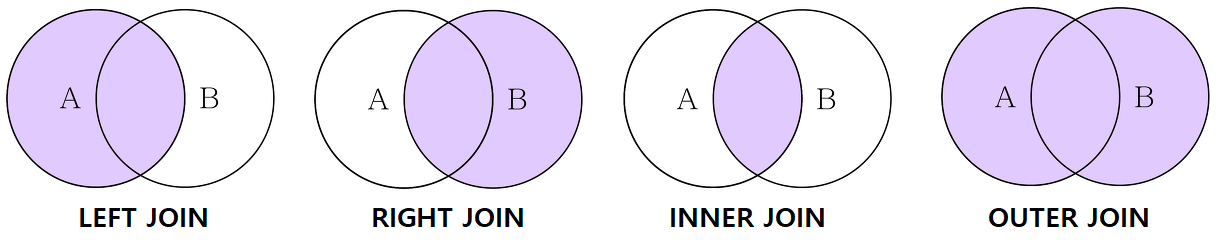

In [9]:
display(df1)
display(df2)

,key,A
0,K0,A0
1,K1,A1
2,K2,A2


,key,B
0,K0,B0
1,K1,B1
2,K3,B3


In [10]:
# Inner join (default)
pd.merge(df1, df2, on="key", how="inner")

,key,A,B
0,K0,A0,B0
1,K1,A1,B1


In [11]:
# Outer join
pd.merge(df1, df2, on="key", how="outer")

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,NaN
3,K3,NaN,B3


In [12]:
# Left join
# df1.merge(right=df2, on="key", how="left")
pd.merge(left=df1, right=df2, on="key", how="left")

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,NaN


In [13]:
# Right join
# df1.merge(right=df2, on="key", how="right")
pd.merge(left=df1, right=df2, on="key", how="right")

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K3,NaN,B3


In [14]:
# Cross join
pd.merge(df1, df2, how="cross", suffixes=("_df1", "_df2"))

,key_df1,A,key_df2,B
0,K0,A0,K0,B0
1,K0,A0,K1,B1
2,K0,A0,K3,B3
3,K1,A1,K0,B0
4,K1,A1,K1,B1
5,K1,A1,K3,B3
6,K2,A2,K0,B0
7,K2,A2,K1,B1
8,K2,A2,K3,B3


---


### **3.2 Merging on specific columns**

You can merge on multiple columns or specify different column names for each DataFrame.


In [15]:
# Sample DataFrames
df1 = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K2"],
        "key2": ["K0", "K1", "K2"],
        "A": ["A0", "A1", "A2"],
    }
)

df2 = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K3"],
        "key2": ["K0", "K1", "K3"],
        "B": ["B0", "B1", "B3"],
    }
)

display(df1)
display(df2)

,key1,key2,A
0,K0,K0,A0
1,K1,K1,A1
2,K2,K2,A2


,key1,key2,B
0,K0,K0,B0
1,K1,K1,B1
2,K3,K3,B3


In [16]:
# Merge on multiple columns
pd.merge(df1, df2, on=["key1", "key2"])

,key1,key2,A,B
0,K0,K0,A0,B0
1,K1,K1,A1,B1


---

In [17]:
# Sample DataFrames
df1 = pd.DataFrame(
    {
        "key_left": ["K0", "K1", "K2"],
        "A": ["A0", "A1", "A2"],
    }
)

df2 = pd.DataFrame(
    {
        "key_right": ["K0", "K1", "K3"],
        "B": ["B0", "B1", "B3"],
    }
)

display(df1)
display(df2)

,key_left,A
0,K0,A0
1,K1,A1
2,K2,A2


,key_right,B
0,K0,B0
1,K1,B1
2,K3,B3


In [18]:
# Merge with different column names
pd.merge(df1, df2, left_on="key_left", right_on="key_right")

,key_left,A,key_right,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1



---


### **3.3 Using Suffixes in Merge**

When merging DataFrames with overlapping column names, you can use the `suffixes` parameter to differentiate them.


In [19]:
# Sample DataFrames with overlapping column names
df1 = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2"],
        "value": [1, 2, 3],
    }
)

df2 = pd.DataFrame(
    {
        "key": ["K0", "K1", "K3"],
        "value": [4, 5, 6],
    }
)

display(df1)
display(df2)

,key,value
0,K0,1
1,K1,2
2,K2,3


,key,value
0,K0,4
1,K1,5
2,K3,6


In [20]:
# Merge with suffixes
pd.merge(df1, df2, on="key", suffixes=("_left", "_right"))

,key,value_left,value_right
0,K0,1,4
1,K1,2,5


---


## **4. Joining DataFrames `df.join()`**


The `df.join()` method is used to join DataFrames based on their indexes.


In [21]:
# Sample DataFrames
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2"],
        "B": ["B0", "B1", "B2"],
    },
    index=["K0", "K1", "K2"],
)

df2 = pd.DataFrame(
    {
        "C": ["C0", "C1", "C2"],
        "D": ["D0", "D1", "D2"],
    },
    index=["K0", "K1", "K3"],
)

display(df1)
display(df2)

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


,C,D
K0,C0,D0
K1,C1,D1
K3,C2,D2


---


### **4.1 Joining on indexes**

You can specify the type of join (`how`) and whether to use the index or columns.


In [22]:
# Inner join on indexes
df1.join(df2, how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,C1,D1


In [23]:
# Outer join on indexes
df1.join(df2, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,C1,D1
K2,A2,B2,NaN,NaN
K3,NaN,NaN,C2,D2


In [24]:
# Left join on indexes
df1.join(df2, how="left")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,C1,D1
K2,A2,B2,NaN,NaN


In [25]:
# Right join on indexes
df1.join(df2, how="right")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,C1,D1
K3,NaN,NaN,C2,D2


---


### **4.2 Using Suffixes in Join**

When joining DataFrames with overlapping column names, you can use the `lsuffix` and `rsuffix` parameters to differentiate them.


In [26]:
# Sample DataFrames with overlapping column names
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2"],
        "B": ["B0", "B1", "B2"],
    },
    index=["K0", "K1", "K2"],
)

df2 = pd.DataFrame(
    {
        "B": ["B3", "B4", "B5"],
        "C": ["C0", "C1", "C2"],
    },
    index=["K0", "K1", "K3"],
)

display(df1)
display(df2)

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


,B,C
K0,B3,C0
K1,B4,C1
K3,B5,C2


In [27]:
# Join with suffixes
df1.join(df2, lsuffix="_left", rsuffix="_right")

,A,B_left,B_right,C
K0,A0,B0,B3,C0
K1,A1,B1,B4,C1
K2,A2,B2,NaN,NaN



---



## **5. Practical Examples and Use Cases**



### **5.1 Combining multiple datasets**


In [28]:
# Example: Combining sales data from multiple regions
sales_north = pd.DataFrame(
    {
        "Region": ["North", "North"],
        "Sales": [100, 150],
    }
)

sales_south = pd.DataFrame(
    {
        "Region": ["South", "South"],
        "Sales": [200, 250],
    }
)

display(sales_north)
display(sales_south)

,Region,Sales
0,North,100
1,North,150


,Region,Sales
0,South,200
1,South,250


In [29]:
# Concatenate sales data
pd.concat([sales_north, sales_south], axis=0)

,Region,Sales
0,North,100
1,North,150
0,South,200
1,South,250


---


### **5.2 Merging customer and order data**


In [30]:
# Example: Merging customer and order data
customers = pd.DataFrame(
    {
        "CustomerID": [1, 2, 3],
        "Name": ["Alice", "Bob", "Charlie"],
    }
)

orders = pd.DataFrame(
    {
        "OrderID": [101, 102, 103],
        "CustomerID": [1, 2, 4],
        "Amount": [50, 100, 200],
    }
)

display(customers)
display(orders)

,CustomerID,Name
0,1,Alice
1,2,Bob
2,3,Charlie


,OrderID,CustomerID,Amount
0,101,1,50
1,102,2,100
2,103,4,200


In [31]:
# Merge on CustomerID
pd.merge(customers, orders, on="CustomerID", how="left")

,CustomerID,Name,OrderID,Amount
0,1,Alice,101.0,50.0
1,2,Bob,102.0,100.0
2,3,Charlie,NaN,NaN


---


### **5.3 Joining employee and department data**


In [32]:
# Example: Joining employee and department data
employees = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3],
        "Name": ["Alice", "Bob", "Charlie"],
        "DeptID": [101, 102, 103],
    }
)

departments = pd.DataFrame(
    {
        "DeptID": [101, 102, 104],
        "DeptName": ["HR", "Finance", "IT"],
    }
)

display(employees)
display(departments)

,EmployeeID,Name,DeptID
0,1,Alice,101
1,2,Bob,102
2,3,Charlie,103


,DeptID,DeptName
0,101,HR
1,102,Finance
2,104,IT


In [33]:
# Join on DeptID
employees.join(departments.set_index("DeptID"), on="DeptID")

,EmployeeID,Name,DeptID,DeptName
0,1,Alice,101,HR
1,2,Bob,102,Finance
2,3,Charlie,103,NaN


In [34]:
pd.merge(employees, departments, on="DeptID", how="left")

,EmployeeID,Name,DeptID,DeptName
0,1,Alice,101,HR
1,2,Bob,102,Finance
2,3,Charlie,103,NaN



---


## **6. Summary Table**

| Method      | Use Case                                      | Key Parameters                     |
|-------------|-----------------------------------------------|------------------------------------|
| `concat`    | Stacking DataFrames vertically/horizontally   | `axis`, `ignore_index`, `keys`     |
| `merge`     | Combining DataFrames based on common columns  | `on`, `how`, `suffixes`            |
| `join`      | Combining DataFrames based on indexes         | `how`, `lsuffix`, `rsuffix`        |

---
